<a href="https://colab.research.google.com/github/sidbardoloye/DB_Trials/blob/master/SidharthaSaratBardoloye_Jan19_2025_CapstoneChurnData_Notes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
file_path = '/content/drive/MyDrive/PGP - DBSA/Capstone Churn Analysis/CC_EDTH_02_Customer Churn/Customer Churn Data(1).xlsx'
data = pd.read_excel(file_path, sheet_name=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [2]:
# Step 1: Standardize Gender values
data['Gender'] = data['Gender'].replace({'Male': 'M', 'M': 'M', 'Female': 'F', 'F': 'F'}).fillna('Unknown')

# Step 2: Handle non-conforming values in Tenure
data['Tenure'] = data['Tenure'].replace({'#': 0}).fillna(0).astype(float)

# Step 3: Update CC_Contacted_LY based on Tenure
data['CC_Contacted_LY'] = data.apply(
    lambda row: 0 if pd.isnull(row['CC_Contacted_LY']) and row['Tenure'] < 2 else row['CC_Contacted_LY'],
    axis=1
)

# Step 4: Drop Payment column
data.drop(columns=['Payment'], inplace=True)

# Step 5: Drop rows with invalid values in Account_user_count
data = data[~data['Account_user_count'].isin(['@', ''])]

# Step 6: Drop rows with blanks in Account_segment and CC_Agent_Score
data = data.dropna(subset=['account_segment', 'CC_Agent_Score'])

# Step 7: Drop rows with blanks in Complain_Ly
data = data.dropna(subset=['Complain_ly'])

# Step 8: Remove invalid values in coupon_used_for_payment
data = data[~data['coupon_used_for_payment'].isin(['$', '#', '*'])]

# Step 9: Remove invalid values in Day_since_last_connect
data = data[~data['Day_Since_CC_connect'].isin(['$', ''])]

# Step 10: Remove invalid values in Login_Device
data = data[~data['Login_device'].isin(['', '&&&&'])]

# Step 11: Remove rows with blank values in City_Tier
data = data.dropna(subset=['City_Tier'])

# Step 12: Remove rows with invalid values in Account_user_count (blanks or '@')
data = data[~data['Account_user_count'].isin(['@', ''])]

data.to_excel('/content/drive/MyDrive/PGP - DBSA/Capstone Churn Analysis/CC_EDTH_02_Customer Churn/cleaned_churned_data.xlsx', index=False)


<ipython-input-2-0fed26d1534e>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Tenure'] = data['Tenure'].replace({'#': 0}).fillna(0).astype(float)


In [3]:
# Based on typical churn prediction logic, select the top 7 columns that are likely to influence churn
# Columns are chosen based on relevance to customer behavior, satisfaction, and engagement.
selected_columns = [
    'Churn',                # Target variable
    'Tenure',               # Length of time an account has been active
    'City_Tier',            # Customer's geographical category
    'Service_Score',        # Satisfaction with the service
    'CC_Contacted_LY',      # Customer care contacts in the last year
    'rev_growth_yoy',       # Year-over-year revenue growth
    'coupon_used_for_payment' # Customer's engagement with discounts
]

# Filter the dataset to retain only these columns
data_top_columns = data[selected_columns]


In [4]:
# Convert necessary columns to numeric to handle missing or invalid values
data_top_columns['rev_growth_yoy'] = pd.to_numeric(data_top_columns['rev_growth_yoy'], errors='coerce')
data_top_columns['CC_Contacted_LY'] = pd.to_numeric(data_top_columns['CC_Contacted_LY'], errors='coerce')

# Drop rows with missing values in 'CC_Contacted_LY' and 'rev_growth_yoy'
data_top_columns = data_top_columns.dropna(subset=['CC_Contacted_LY', 'rev_growth_yoy'])

<ipython-input-4-9596df3a92c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_columns['rev_growth_yoy'] = pd.to_numeric(data_top_columns['rev_growth_yoy'], errors='coerce')
<ipython-input-4-9596df3a92c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_columns['CC_Contacted_LY'] = pd.to_numeric(data_top_columns['CC_Contacted_LY'], errors='coerce')


In [5]:
data_top_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9956 entries, 0 to 11259
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    9956 non-null   int64  
 1   Tenure                   9956 non-null   float64
 2   City_Tier                9956 non-null   float64
 3   Service_Score            9956 non-null   float64
 4   CC_Contacted_LY          9956 non-null   float64
 5   rev_growth_yoy           9956 non-null   float64
 6   coupon_used_for_payment  9956 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 622.2+ KB


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Select relevant columns and engineer features
data['rev_per_month'] = pd.to_numeric(data['rev_per_month'], errors='coerce')
data['Tenure'] = pd.to_numeric(data['Tenure'], errors='coerce')
data['CLV'] = data['rev_per_month'] * data['Tenure']

# Filter for columns to use in the prediction
selected_columns = [
    'Churn', 'Tenure', 'City_Tier', 'Service_Score', 'CC_Contacted_LY',
    'rev_growth_yoy', 'coupon_used_for_payment', 'CLV'
]
data_top_columns = data[selected_columns]

# Convert necessary columns to numeric
data_top_columns['rev_growth_yoy'] = pd.to_numeric(data_top_columns['rev_growth_yoy'], errors='coerce')
data_top_columns['CC_Contacted_LY'] = pd.to_numeric(data_top_columns['CC_Contacted_LY'], errors='coerce')

# Drop rows with missing values
data_top_columns = data_top_columns.dropna()

# Split features and target
X = data_top_columns.drop(columns=['Churn'])
y = data_top_columns['Churn']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# display the results

print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)



<ipython-input-46-a913cf7763e5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_columns['rev_growth_yoy'] = pd.to_numeric(data_top_columns['rev_growth_yoy'], errors='coerce')
<ipython-input-46-a913cf7763e5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_columns['CC_Contacted_LY'] = pd.to_numeric(data_top_columns['CC_Contacted_LY'], errors='coerce')


ROC AUC: 0.9850438782647163
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1636
           1       0.94      0.95      0.94      1636

    accuracy                           0.94      3272
   macro avg       0.94      0.94      0.94      3272
weighted avg       0.94      0.94      0.94      3272

Confusion Matrix:
 [[1541   95]
 [  89 1547]]


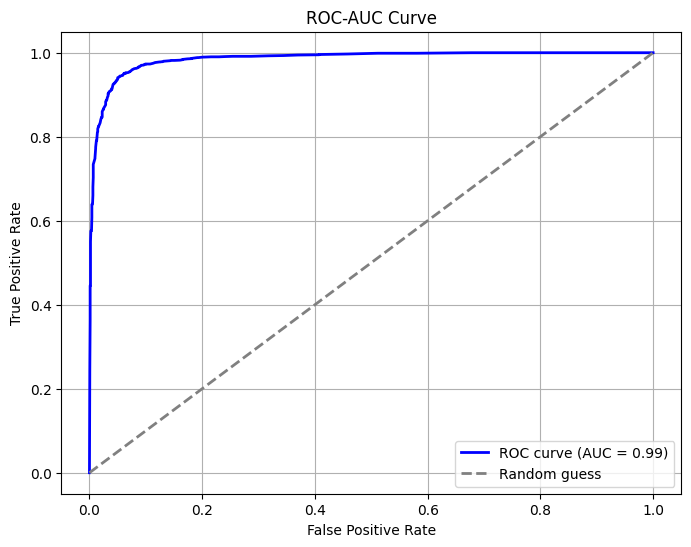

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print ("ROC AUC: ",roc_auc)
print("Logistic Regression Classification Report:\n", report_logistic)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logistic)


ROC AUC:  0.9850438782647163
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.64      0.72      1636
           1       0.70      0.85      0.77      1636

    accuracy                           0.75      3272
   macro avg       0.76      0.75      0.74      3272
weighted avg       0.76      0.75      0.74      3272

Logistic Regression Confusion Matrix:
 [[1049  587]
 [ 243 1393]]


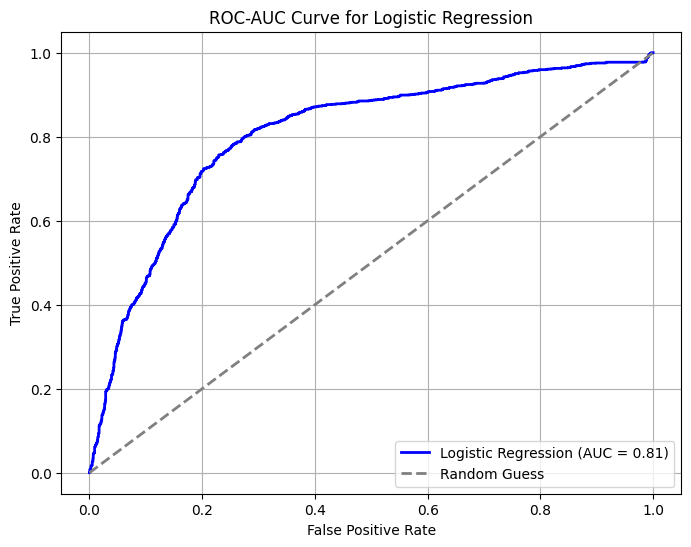

In [ ]:
# ROC AUC curve, logistic
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for logistic regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the ROC-AUC curve for logistic regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions with the best model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)



print("Best Hyperparameters:\n", best_params)
print("Tuned Logistic Regression Classification Report:\n", report_tuned)
print("Tuned Logistic Regression Confusion Matrix:\n", conf_matrix_tuned)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1050 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

Best Hyperparameters:
 {'C': 100, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Tuned Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72      1636
           1       0.71      0.85      0.77      1636

    accuracy                           0.75      3272
   macro avg       0.76      0.75      0.75      3272
weighted avg       0.76      0.75      0.75      3272

Tuned Logistic Regression Confusion Matrix:
 [[1065  571]
 [ 253 1383]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Train a Gradient Boosting Classifier
ensemble_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Display results for the ensemble model
print("Ensemble Model - ROC AUC:", roc_auc_ensemble)

print("Ensemble Method Classification Report:\n", report_ensemble)
print("Ensemble Method Confusion Matrix:\n", conf_matrix_ensemble)


Ensemble Model - ROC AUC: 0.9557905186482626
Ensemble Method Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1636
           1       0.87      0.91      0.89      1636

    accuracy                           0.89      3272
   macro avg       0.89      0.89      0.89      3272
weighted avg       0.89      0.89      0.89      3272

Ensemble Method Confusion Matrix:
 [[1419  217]
 [ 154 1482]]


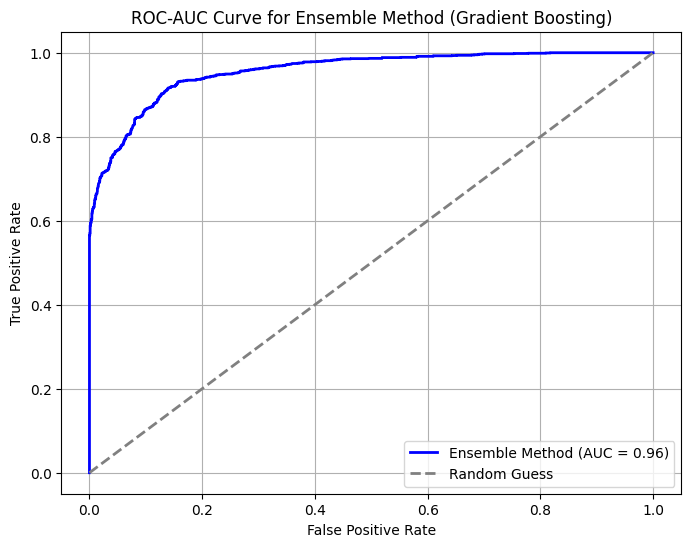

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for the ensemble method (Gradient Boosting)
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, y_pred_proba_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot the ROC-AUC curve for the ensemble method
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='blue', lw=2, label=f'Ensemble Method (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Ensemble Method (Gradient Boosting)')
plt.legend(loc="lower right")
plt.grid()
plt.show()
